# Ввод датасетов и их первичная обработка

In [15]:
pip install tabulate 

Note: you may need to restart the kernel to use updated packages.


In [77]:
# загрузка всех дадасетов из файлов и чистка временных меток

import pandas as pd
import datetime as dt
import time

start_time = time.time()

### ввод датасетов

RezL=pd.read_csv('Harv_I_RezL.CSV',delimiter=';') # левый привод резания
RezR=pd.read_csv('Harv_I_RezR.CSV',delimiter=';') # правый привод резания
Pod=pd.read_csv('Harv_I_PodachaR.CSV',delimiter=';') # привод подачи (видимо правый)

I_a=pd.read_csv('Cell4_I_A.CSV',delimiter=';') # ток фазы А на стороне 6 кВ
I_b=pd.read_csv('Cell4_I_B.CSV',delimiter=';') # ток фазы B на стороне 6 кВ
I_c=pd.read_csv('Cell4_I_C.CSV',delimiter=';') # ток фазы C на стороне 6 кВ

Pact=pd.read_csv('Cell4_Pactive.CSV',delimiter=';') # активная мощность на стороне 6 кВ (одной фазы)
Cosp=pd.read_csv('Cos.csv',delimiter=';') # cos phi 6 кВ (за август?!)

Shield=pd.read_csv('Harv_Shield.CSV',delimiter=';') # перемещение
Traf=pd.read_csv('52_tonn_chas_1.CSV',delimiter=';') # грузопоток
Uncert=pd.read_csv('52_harv_uncert.CSV',delimiter=';') # проблемы со связью


# удаление долей секунд из меток времени
## Массив грузопотока
# поиск всех строк по критерию отсутствия ":" в последних 3х знаках
# добавление "20" к записи года
tes = Traf['DateTime'][ Traf['DateTime'].str[-3:].str.contains(':') == False ].str[:8] + '20' + Traf['DateTime'][ Traf['DateTime'].str[-3:].str.contains(':') == False ].str[8:]
# удаление последних 4х знаков в строках (доли секунды)
tes = tes.str[:-4]
# обновление исходного массива скорректированными значениями
Traf.update(tes)

## Массив ошибок
tes = Uncert['DateTime'][ Uncert['DateTime'].str[-3:].str.contains(':') == False ].str[:8] + '20' + Uncert['DateTime'][ Uncert['DateTime'].str[-3:].str.contains(':') == False ].str[8:]
tes = tes.str[:-4]
Uncert.update(tes)


# преобразование меток времени str --> date

RezL['DateTime']= pd.to_datetime(RezL['DateTime'], format ="%d.%m.%Y %H:%M:%S")
RezR['DateTime']= pd.to_datetime(RezR['DateTime'], format ="%d.%m.%Y %H:%M:%S")
Pod['DateTime']= pd.to_datetime(Pod['DateTime'], format ="%d.%m.%Y %H:%M:%S")
I_a['DateTime']= pd.to_datetime(I_a['DateTime'], format ="%d.%m.%Y %H:%M:%S")
I_b['DateTime']= pd.to_datetime(I_b['DateTime'], format ="%d.%m.%Y %H:%M:%S")
I_c['DateTime']= pd.to_datetime(I_c['DateTime'], format ="%d.%m.%Y %H:%M:%S")
Pact['DateTime']= pd.to_datetime(Pact['DateTime'], format ="%d.%m.%Y %H:%M:%S")
Shield['DateTime']= pd.to_datetime(Shield['DateTime'], format ="%d.%m.%Y %H:%M:%S")
Traf['DateTime']= pd.to_datetime(Traf['DateTime'], format ="%d.%m.%Y %H:%M:%S")
Uncert['DateTime']= pd.to_datetime(Uncert['DateTime'], format ="%d.%m.%Y %H:%M:%S")

print("Загрузка датасетов завершена. Время -  %s сек" % (time.time() - start_time))

### дозаполнение дырок в массивах

# создание массива меток времени с шагом в 1 сек
TimeRange = pd.DataFrame(columns = ['DateTime'])
TimeRange['DateTime'] = pd.date_range(start=pd.Timestamp('9/11/2020 00:00:00'), end=pd.Timestamp('11/23/2020 00:00:00'), freq = '1S')
TimeRange['DateTime']= pd.to_datetime(TimeRange['DateTime'], format ="%d.%m.%Y %H:%M:%S")

print("Подготовка массива TimeRange завершена. Время -  %s сек" % (time.time() - start_time))

## левый привод резания
RezL = pd.merge(TimeRange, RezL, how='outer', on = 'DateTime') # совмещение TimeRange и RezL по времени
RezL = RezL.fillna(method='ffill') # замена NaN на последнее числовое значение
RezL = RezL.drop_duplicates(subset=['DateTime']) # удаление повторных замеров в одно время
RezL = RezL.iloc[::5, :] # установить шаг в 5 сек
RezL = RezL.reset_index() # сбросить индексы
RezL = RezL.drop(['index', 'Shit'], axis=1) # удалить лишние столбцы

print("Обработка массива RezL завершена. Время -  %s сек" % (time.time() - start_time))

## правый привод резания
RezR = pd.merge(TimeRange, RezR, how='outer', on = 'DateTime') 
RezR = RezR.fillna(method='ffill') 
RezR = RezR.drop_duplicates(subset=['DateTime']) 
RezR = RezR.iloc[::5, :] 
RezR = RezR.reset_index() 
RezR = RezR.drop(['index', 'Shit'], axis=1) 

print("Обработка массива RezR завершена. Время -  %s сек" % (time.time() - start_time))

## привод подачи
Pod = pd.merge(TimeRange, Pod, how='outer', on = 'DateTime') 
Pod = Pod.fillna(method='ffill') 
Pod = Pod.drop_duplicates(subset=['DateTime']) 
Pod = Pod.iloc[::5, :] 
Pod = Pod.reset_index() 
Pod = Pod.drop(['index', 'Comment'], axis=1) 

print("Обработка массива Pod завершена. Время -  %s сек" % (time.time() - start_time))

## перемещение
Shield = pd.merge(TimeRange, Shield, how='outer', on = 'DateTime') 
Shield = Shield.fillna(method='ffill') 
Shield = Shield.drop_duplicates(subset=['DateTime']) 
Shield = Shield.iloc[::5, :] 
Shield = Shield.reset_index() 
Shield = Shield.drop(['index', 'Comment'], axis=1) 

print("Обработка массива Shield завершена. Время -  %s сек" % (time.time() - start_time))

## проблемы со связью
Uncert = pd.merge(TimeRange, Uncert, how='outer', on = 'DateTime') 
Uncert = Uncert.fillna(method='ffill') 
Uncert = Uncert.drop_duplicates(subset=['DateTime']) 
Uncert = Uncert.iloc[::5, :] 
Uncert = Uncert.reset_index() 
Uncert = Uncert.drop(['index', 'Comment'], axis=1) 

print("Обработка массива Uncert завершена. Время -  %s сек" % (time.time() - start_time))

## грузопоток
Traf = pd.merge(TimeRange, Traf, how='outer', on = 'DateTime') 
Traf = Traf.fillna(method='ffill') 
Traf = Traf.drop_duplicates(subset=['DateTime']) 
Traf = Traf.iloc[::5, :] 
Traf = Traf.reset_index() 
Traf = Traf.drop(['index', 'Comment'], axis=1) 

print("Обработка массива Traf завершена. Время -  %s сек" % (time.time() - start_time))

## Ia 6 кВ
I_a = pd.merge(TimeRange, I_a, how='outer', on = 'DateTime') 
I_a = I_a.fillna(method='ffill') 
I_a = I_a.drop_duplicates(subset=['DateTime']) 
I_a = I_a.iloc[::5, :] 
I_a = I_a.reset_index() 
I_a = I_a.drop(['index', 'Comment'], axis=1) 

## Ib 6 кВ
I_b = pd.merge(TimeRange, I_b, how='outer', on = 'DateTime') 
I_b = I_b.fillna(method='ffill') 
I_b = I_b.drop_duplicates(subset=['DateTime']) 
I_b = I_b.iloc[::5, :] 
I_b = I_b.reset_index() 
I_b = I_b.drop(['index', 'Comment'], axis=1) 

## Ic 6 кВ
I_c = pd.merge(TimeRange, I_c, how='outer', on = 'DateTime') 
I_c = I_c.fillna(method='ffill') 
I_c = I_c.drop_duplicates(subset=['DateTime']) 
I_c = I_c.iloc[::5, :] 
I_c = I_c.reset_index() 
I_c = I_c.drop(['index', 'Comment'], axis=1) 

print("Обработка массива Iabc завершена. Время -  %s сек" % (time.time() - start_time))
print("Дозаполнение массивов завершено. Время -  %s сек" % (time.time() - start_time))

### добавление к массивам меток сомнительных значений

RezL = pd.merge(RezL, Uncert, how='outer', on = 'DateTime') 
RezR = pd.merge(RezR, Uncert, how='outer', on = 'DateTime') 
Pod = pd.merge(Pod, Uncert, how='outer', on = 'DateTime') 
Shield = pd.merge(Shield, Uncert, how='outer', on = 'DateTime') 
Traf = pd.merge(Traf, Uncert, how='outer', on = 'DateTime') 
I_a = pd.merge(I_a, Uncert, how='outer', on = 'DateTime')
I_b = pd.merge(I_b, Uncert, how='outer', on = 'DateTime')
I_c = pd.merge(I_c, Uncert, how='outer', on = 'DateTime')

Загрузка датасетов завершена. Время -  17.32662534713745 сек
Подготовка массива TimeRange завершена. Время -  17.95237898826599 сек
Обработка массива RezL завершена. Время -  21.818843841552734 сек
Обработка массива RezR завершена. Время -  25.653762578964233 сек
Обработка массива Pod завершена. Время -  29.691834449768066 сек
Обработка массива Shield завершена. Время -  33.53221583366394 сек
Обработка массива Uncert завершена. Время -  37.30831527709961 сек
Обработка массива Traf завершена. Время -  41.23105430603027 сек
Обработка массива Iabc завершена. Время -  52.4695885181427 сек
Дозаполнение массивов завершено. Время -  52.4695885181427 сек


In [78]:
# вырезание из массива нерабочих смен

from datetime import datetime

st1 = datetime(2020,9,17,9,0,3)
sp1 = datetime(2020,9,18,1,0,4)

st2 = datetime(2020,10,7,1,0,1)
sp2 = datetime(2020,10,7,9,0,3)

st3 = datetime(2020,11,7,17,0,0)
sp3 = datetime(2020,11,14,1,0,1)

st4 = datetime(2020,11,14,9,0,2)
sp4 = datetime(2020,11,16,1,0,0)

st5 = datetime(2020,11,18,1,0,0)
sp5 = datetime(2020,11,18,9,0,0)

RezL = RezL.loc[ (RezL['DateTime'] < st1) | (RezL['DateTime'] > sp1) ]
RezL = RezL.loc[ (RezL['DateTime'] < st2) | (RezL['DateTime'] > sp2) ]
RezL = RezL.loc[ (RezL['DateTime'] < st3) | (RezL['DateTime'] > sp3) ]
RezL = RezL.loc[ (RezL['DateTime'] < st4) | (RezL['DateTime'] > sp4) ]
RezL = RezL.loc[ (RezL['DateTime'] < st5) | (RezL['DateTime'] > sp5) ]

RezR = RezR.loc[ (RezR['DateTime'] < st1) | (RezR['DateTime'] > sp1) ]
RezR = RezR.loc[ (RezR['DateTime'] < st2) | (RezR['DateTime'] > sp2) ]
RezR = RezR.loc[ (RezR['DateTime'] < st3) | (RezR['DateTime'] > sp3) ]
RezR = RezR.loc[ (RezR['DateTime'] < st4) | (RezR['DateTime'] > sp4) ]
RezR = RezR.loc[ (RezR['DateTime'] < st5) | (RezR['DateTime'] > sp5) ]

Pod = Pod.loc[ (Pod['DateTime'] < st1) | (Pod['DateTime'] > sp1) ]
Pod = Pod.loc[ (Pod['DateTime'] < st2) | (Pod['DateTime'] > sp2) ]
Pod = Pod.loc[ (Pod['DateTime'] < st3) | (Pod['DateTime'] > sp3) ]
Pod = Pod.loc[ (Pod['DateTime'] < st4) | (Pod['DateTime'] > sp4) ]
Pod = Pod.loc[ (Pod['DateTime'] < st5) | (Pod['DateTime'] > sp5) ]

Shield = Shield.loc[ (Shield['DateTime'] < st1) | (Shield['DateTime'] > sp1) ]
Shield = Shield.loc[ (Shield['DateTime'] < st2) | (Shield['DateTime'] > sp2) ]
Shield = Shield.loc[ (Shield['DateTime'] < st3) | (Shield['DateTime'] > sp3) ]
Shield = Shield.loc[ (Shield['DateTime'] < st4) | (Shield['DateTime'] > sp4) ]
Shield = Shield.loc[ (Shield['DateTime'] < st5) | (Shield['DateTime'] > sp5) ]

Traf = Traf.loc[ (Traf['DateTime'] < st1) | (Traf['DateTime'] > sp1) ]
Traf = Traf.loc[ (Traf['DateTime'] < st2) | (Traf['DateTime'] > sp2) ]
Traf = Traf.loc[ (Traf['DateTime'] < st3) | (Traf['DateTime'] > sp3) ]
Traf = Traf.loc[ (Traf['DateTime'] < st4) | (Traf['DateTime'] > sp4) ]
Traf = Traf.loc[ (Traf['DateTime'] < st5) | (Traf['DateTime'] > sp5) ]

I_a = I_a.loc[ (I_a['DateTime'] < st1) | (I_a['DateTime'] > sp1) ]
I_a = I_a.loc[ (I_a['DateTime'] < st2) | (I_a['DateTime'] > sp2) ]
I_a = I_a.loc[ (I_a['DateTime'] < st3) | (I_a['DateTime'] > sp3) ]
I_a = I_a.loc[ (I_a['DateTime'] < st4) | (I_a['DateTime'] > sp4) ]
I_a = I_a.loc[ (I_a['DateTime'] < st5) | (I_a['DateTime'] > sp5) ]

I_b = I_b.loc[ (I_b['DateTime'] < st1) | (I_b['DateTime'] > sp1) ]
I_b = I_b.loc[ (I_b['DateTime'] < st2) | (I_b['DateTime'] > sp2) ]
I_b = I_b.loc[ (I_b['DateTime'] < st3) | (I_b['DateTime'] > sp3) ]
I_b = I_b.loc[ (I_b['DateTime'] < st4) | (I_b['DateTime'] > sp4) ]
I_b = I_b.loc[ (I_b['DateTime'] < st5) | (I_b['DateTime'] > sp5) ]

I_c = I_c.loc[ (I_c['DateTime'] < st1) | (I_c['DateTime'] > sp1) ]
I_c = I_c.loc[ (I_c['DateTime'] < st2) | (I_c['DateTime'] > sp2) ]
I_c = I_c.loc[ (I_c['DateTime'] < st3) | (I_c['DateTime'] > sp3) ]
I_c = I_c.loc[ (I_c['DateTime'] < st4) | (I_c['DateTime'] > sp4) ]
I_c = I_c.loc[ (I_c['DateTime'] < st5) | (I_c['DateTime'] > sp5) ]

In [79]:
# очистка всех сомнительных значений из массивов

RezL_un = RezL[RezL['Uncert'] != 1]
RezR_un = RezR[RezR['Uncert'] != 1]
Pod_un = Pod[Pod['Uncert'] != 1]
Shield_un = Shield[Shield['Uncert'] != 1]
Traf_un = Traf[Traf['Uncert'] != 1]
Ia_un = I_a[I_a['Uncert'] != 1]
Ib_un = I_b[I_b['Uncert'] != 1]
Ic_un = I_c[I_c['Uncert'] != 1]

# очистка всех нулевых значений

RezL_w0 = RezL[RezL['Current'] > 0]
RezR_w0 = RezR[RezR['Current'] > 0]
Pod_w0 = Pod[Pod['Current'] > 0]
Ia_w0 = I_a[I_a['Current'] > 0]
Ib_w0 = I_b[I_b['Current'] > 0]
Ic_w0 = I_c[I_c['Current'] > 0]

# Статистические характеристики 

In [6]:
# токи с нулевыми значениями 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

Res_un = pd.concat([RezL_un['Current'], RezR_un['Current'], Pod_un['Current'], Ia_un['Current'], Ib_un['Current'], Ic_un['Current']], axis=1, join="outer")

Res_un.columns = ['Левый привод резания', 'Правый привод резания', 'Привод подачи', 'Ia', 'Ib', 'Ic']

Res_un.describe()

,Левый привод резания,Правый привод резания,Привод подачи,Ia,Ib,Ic
count,1014770.00,1014770.00,1014770.00,1014770.00,1014770.00,1014770.00
mean,37.69,28.25,37.69,39.22,38.55,36.97
std,44.51,33.74,37.76,40.64,40.11,38.91
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,43.00,41.00,45.00,47.00,45.00,44.00
75%,56.00,46.00,70.00,66.00,64.00,61.00
max,1054.00,1046.00,182.00,643.00,628.00,666.00


In [7]:
# токи без нулевых значений 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

Res_w0 = pd.concat([RezL_w0['Current'], RezR_w0['Current'], Pod_w0['Current'], Ia_w0['Current'], Ib_w0['Current'], Ic_w0['Current']], axis=1, join="outer")

Res_w0.columns = ['Левый привод резания', 'Правый привод резания', 'Привод подачи', 'Ia', 'Ib', 'Ic']

Res_w0.describe()

,Левый привод резания,Правый привод резания,Привод подачи,Ia,Ib,Ic
count,602673.00,598374.00,556359.00,601202.00,601263.00,596072.00
mean,64.50,48.70,69.91,67.63,66.47,64.30
std,40.75,31.17,19.80,30.52,30.35,29.65
min,20.00,20.00,3.00,8.00,9.00,10.00
25%,45.00,43.00,59.00,51.00,50.00,48.00
50%,51.00,45.00,66.00,63.00,61.00,58.00
75%,74.00,50.00,80.00,77.00,76.00,73.00
max,1054.00,1046.00,182.00,643.00,628.00,666.00


In [39]:
# расчет коэффициентов вариации
import numpy as np
from tabulate import tabulate

Kv = np.array([['Коэф. вариац. с нулями',
                RezL_un['Current'].std() / RezL_un['Current'].mean(), 
                RezR_un['Current'].std() / RezR_un['Current'].mean(),
                Pod_un['Current'].std() / Pod_un['Current'].mean(),
                Ia_un['Current'].std() / Ia_un['Current'].mean(),
                Ib_un['Current'].std() / Ib_un['Current'].mean(),
                Ic_un['Current'].std() / Ic_un['Current'].mean()],
              ['Коэф. вариац. без нулей',
                RezL_w0['Current'].std() / RezL_w0['Current'].mean(), 
                RezR_w0['Current'].std() / RezR_w0['Current'].mean(),
                Pod_w0['Current'].std() / Pod_w0['Current'].mean(),
                Ia_w0['Current'].std() / Ia_w0['Current'].mean(),
                Ib_w0['Current'].std() / Ib_w0['Current'].mean(),
                Ic_w0['Current'].std() / Ic_w0['Current'].mean()]])

headers = ['Лев. резания', 'Пр. резания', 'Привод подачи', 'Ia', 'Ib', 'Ic']

table = tabulate(Kv, headers, tablefmt="fancy_grid")

print(table)


╒═════════════════════════╤════════════════╤═══════════════╤═════════════════╤══════════╤══════════╤══════════╕
│                         │   Лев. резания │   Пр. резания │   Привод подачи │       Ia │       Ib │       Ic │
╞═════════════════════════╪════════════════╪═══════════════╪═════════════════╪══════════╪══════════╪══════════╡
│ Коэф. вариац. с нулями  │       1.18095  │      1.19441  │        1.00175  │ 1.03642  │ 1.04034  │ 1.05232  │
├─────────────────────────┼────────────────┼───────────────┼─────────────────┼──────────┼──────────┼──────────┤
│ Коэф. вариац. без нулей │       0.631779 │      0.640009 │        0.283205 │ 0.451323 │ 0.456628 │ 0.461093 │
╘═════════════════════════╧════════════════╧═══════════════╧═════════════════╧══════════╧══════════╧══════════╛


# Время работы и простоя

In [40]:
# подсчет времени работы и простоя по левому приводу резания

import datetime
import time
import math

start_time = time.time()

t1 = RezL_un['DateTime'][0]

j = 0
X = 0
Y = 0
M = 8

column_names = ["WorkPeriod","Downtime","StartTime","StopTime"]
RezL_time = pd.DataFrame(columns = column_names)

RezL_time.loc[0,'StartTime'] = RezL_un['DateTime'][0]

for row in RezL_un.itertuples():

    if abs(row.DateTime.month - M) > 0: # вывод прогресса обработки массива
        print(row.DateTime)
        print("--- %s seconds ---" % (time.time() - start_time))
        M = row.DateTime.month
        
    X = row.Current == 0
    
    if X == 0 and Y == 1: # пуск
        dT=t2-t1
        dT=dT.total_seconds()
        RezL_time.loc[j,'WorkPeriod'] = dT
        j=j+1
        t1=row.DateTime
        RezL_time.loc[j,'StartTime'] = row.DateTime
        
        dT=t1-t2
        dT=dT.total_seconds()
        RezL_time.loc[j,'Downtime'] = dT
        
    elif X == 0 and Y == 0: # работа
        pass
    
    elif X == 1 and Y == 0: # остановка        
        t2 = row.DateTime
        RezL_time.loc[j,'StopTime'] = row.DateTime
        
    elif X == 1 and Y == 1: # простой
        pass   
    
    Y = row.Current == 0

2020-09-11 00:00:00
--- 0.014990091323852539 seconds ---
2020-10-01 00:00:00
--- 1.13724684715271 seconds ---
2020-11-01 00:00:00
--- 2.7971906661987305 seconds ---


In [42]:
# подсчет времени работы и простоя по правому приводу резания

import datetime
import time
import math

start_time = time.time()

t1 = RezR_un['DateTime'][0]

j = 0
X = 0
Y = 0
M = 8

column_names = ["WorkPeriod","Downtime","StartTime","StopTime"]
RezR_time = pd.DataFrame(columns = column_names)

RezR_time.loc[0,'StartTime'] = RezR_un['DateTime'][0]

for row in RezR_un.itertuples():

    if abs(row.DateTime.month - M) > 0: # вывод прогресса обработки массива
        print(row.DateTime)
        print("--- %s seconds ---" % (time.time() - start_time))
        M = row.DateTime.month
        
    X = row.Current == 0
    
    if X == 0 and Y == 1: # пуск
        dT = t2-t1
        dT = dT.total_seconds()
        RezR_time.loc[j,'WorkPeriod'] = dT
        j = j+1
        t1 = row.DateTime
        RezR_time.loc[j,'StartTime'] = row.DateTime
        
        dT = t1-t2
        dT = dT.total_seconds()
        RezR_time.loc[j,'Downtime'] = dT
        
    elif X == 0 and Y == 0: # работа
        pass
    
    elif X == 1 and Y == 0: # остановка        
        t2 = row.DateTime
        RezR_time.loc[j,'StopTime'] = row.DateTime
        
    elif X == 1 and Y == 1: # простой
        pass   
    
    Y = row.Current == 0

2020-09-11 00:00:00
--- 0.014622688293457031 seconds ---
2020-10-01 00:00:00
--- 1.1105942726135254 seconds ---
2020-11-01 00:00:00
--- 2.910306692123413 seconds ---


In [43]:
# подсчет времени работы и простоя по сменам RezL

import datetime
import time
import math

start_time = time.time()

t1 = RezL_un['DateTime'][0]
j = 0

Work = 0
Stop = 0

S10 = 0
S20 = 0
S30 = 0

column_names = ["Shift","Date","WorkPeriod","Downtime"]
RezL_time_shift = pd.DataFrame(columns = column_names)

for row in RezL_un.itertuples():
    
    h = row.DateTime.hour
    if h == 0: h = 24
    
    S1 = h >= 9 and h <= 16
    S2 = h >= 17 and h <= 24
    S3 = h >= 1 and h <= 8
    
    if S1 == 1 and S10 == 0:
        RezL_time_shift.loc[j,'Shift'] = ('Shift 3')
        RezL_time_shift.loc[j,'Date'] = row.DateTime
        RezL_time_shift.loc[j,'WorkPeriod'] = Work
        RezL_time_shift.loc[j,'Downtime'] = Stop
        Work = 0
        Stop = 0
        j = j + 1
        
    if S2 == 1 and S20 == 0:
        RezL_time_shift.loc[j,'Shift'] = ('Shift 1')
        RezL_time_shift.loc[j,'Date'] = row.DateTime
        RezL_time_shift.loc[j,'WorkPeriod'] = Work
        RezL_time_shift.loc[j,'Downtime'] = Stop
        Work = 0
        Stop = 0
        j = j + 1

    if S3 == 1 and S30 == 0:
        RezL_time_shift.loc[j,'Shift'] = ('Shift 2')
        RezL_time_shift.loc[j,'Date'] = row.DateTime
        RezL_time_shift.loc[j,'WorkPeriod'] = Work
        RezL_time_shift.loc[j,'Downtime'] = Stop
        Work = 0
        Stop = 0
        j = j + 1
    
    if row.Current > 0:
        Work = Work + 5
    
    if row.Current == 0:
        Stop = Stop + 5
    
    S10 = S1
    S20 = S2
    S30 = S3

In [45]:
# подсчет времени работы и простоя по сменам RezR

import datetime
import time
import math

start_time = time.time()

t1 = RezR_un['DateTime'][0]
j = 0

Work = 0
Stop = 0

S10 = 0
S20 = 0
S30 = 0

column_names = ["Shift","Date","WorkPeriod","Downtime"]
RezR_time_shift = pd.DataFrame(columns = column_names)

for row in RezR_un.itertuples():
    
    h = row.DateTime.hour
    if h == 0: h = 24
    
    S1 = h >= 9 and h <= 16
    S2 = h >= 17 and h <= 24
    S3 = h >= 1 and h <= 8
    
    if S1 == 1 and S10 == 0:
        RezR_time_shift.loc[j,'Shift'] = ('Shift 3')
        RezR_time_shift.loc[j,'Date'] = row.DateTime
        RezR_time_shift.loc[j,'WorkPeriod'] = Work
        RezR_time_shift.loc[j,'Downtime'] = Stop
        Work = 0
        Stop = 0
        j = j + 1
        
    if S2 == 1 and S20 == 0:
        RezR_time_shift.loc[j,'Shift'] = ('Shift 1')
        RezR_time_shift.loc[j,'Date'] = row.DateTime
        RezR_time_shift.loc[j,'WorkPeriod'] = Work
        RezR_time_shift.loc[j,'Downtime'] = Stop
        Work = 0
        Stop = 0
        j = j + 1

    if S3 == 1 and S30 == 0:
        RezR_time_shift.loc[j,'Shift'] = ('Shift 2')
        RezR_time_shift.loc[j,'Date'] = row.DateTime
        RezR_time_shift.loc[j,'WorkPeriod'] = Work
        RezR_time_shift.loc[j,'Downtime'] = Stop
        Work = 0
        Stop = 0
        j = j + 1
    
    if row.Current > 0:
        Work = Work + 5
    
    if row.Current == 0:
        Stop = Stop + 5
    
    S10 = S1
    S20 = S2
    S30 = S3

In [110]:
# Расчет числовых параметров работы / простоя

import numpy as np
from tabulate import tabulate

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

RezL_time_shift_f = RezL_time_shift.drop([0,1], axis=0)
RezR_time_shift_f = RezR_time_shift.drop([0,1], axis=0)
RezL_time_shift_f['WorkPeriod'] = pd.to_numeric(RezL_time_shift_f['WorkPeriod'])
RezL_time_shift_f['Downtime'] = pd.to_numeric(RezL_time_shift_f['Downtime'])
RezR_time_shift_f['WorkPeriod'] = pd.to_numeric(RezR_time_shift_f['WorkPeriod'])
RezR_time_shift_f['Downtime'] = pd.to_numeric(RezR_time_shift_f['Downtime'])

Shift_L = RezL_time_shift_f.groupby(['Shift']).mean()/60
Shift_R = RezR_time_shift_f.groupby(['Shift']).mean()/60

RezL_time['Cycle'] = RezL_time['WorkPeriod'] + RezL_time['Downtime']
RezL_time['PV'] = RezL_time['WorkPeriod'] / RezL_time['Cycle']

RezR_time['Cycle'] = RezR_time['WorkPeriod'] + RezR_time['Downtime']
RezR_time['PV'] = RezR_time['WorkPeriod'] / RezR_time['Cycle']

P1 = np.array([['Кол-во смен',
                len(RezR_time_shift_f), 
                len(RezL_time_shift_f[RezL_time_shift_f['Shift'] == 'Shift 1']),
                len(RezL_time_shift_f[RezL_time_shift_f['Shift'] == 'Shift 2']),
                len(RezL_time_shift_f[RezL_time_shift_f['Shift'] == 'Shift 3'])],
              ['Средняя продолжительность работы, мин'],
              ['левый',
                RezL_time_shift_f['WorkPeriod'].mean()/60, 
                Shift_L['WorkPeriod'][0],
                Shift_L['WorkPeriod'][1],
                Shift_L['WorkPeriod'][2]],
             ['правый',
                RezR_time_shift_f['WorkPeriod'].mean()/60, 
                Shift_R['WorkPeriod'][0],
                Shift_R['WorkPeriod'][1],
                Shift_R['WorkPeriod'][2]],
             ['среднее',
                (RezL_time_shift_f['WorkPeriod'].mean()/60 + RezR_time_shift_f['WorkPeriod'].mean()/60) / 2, 
                (Shift_L['WorkPeriod'][0] + Shift_R['WorkPeriod'][0]) / 2,
                (Shift_L['WorkPeriod'][1] + Shift_R['WorkPeriod'][1]) / 2,
                (Shift_L['WorkPeriod'][2] + Shift_R['WorkPeriod'][2]) / 2],
             ['Средняя продолжительность простоев, мин'],
              ['левый',
                RezL_time_shift_f['Downtime'].mean()/60, 
                Shift_L['Downtime'][0],
                Shift_L['Downtime'][1],
                Shift_L['Downtime'][2]],
             ['правый',
                RezR_time_shift_f['Downtime'].mean()/60, 
                Shift_R['Downtime'][0],
                Shift_R['Downtime'][1],
                Shift_R['Downtime'][2]],
             ['среднее',
                (RezL_time_shift_f['Downtime'].mean()/60 + RezR_time_shift_f['Downtime'].mean()/60) / 2, 
                (Shift_L['Downtime'][0] + Shift_R['Downtime'][0]) / 2,
                (Shift_L['Downtime'][1] + Shift_R['Downtime'][1]) / 2,
                (Shift_L['Downtime'][2] + Shift_R['Downtime'][2]) / 2],
             ['Коэффициент машинного времени'],
              ['левый',
                (RezL_time_shift_f['WorkPeriod'].mean()/60) / (8*60), 
                Shift_L['WorkPeriod'][0] / (8*60),
                Shift_L['WorkPeriod'][1] / (8*60),
                Shift_L['WorkPeriod'][2] / (8*60)],
             ['правый',
                (RezR_time_shift_f['WorkPeriod'].mean()/60) / (8*60), 
                Shift_R['WorkPeriod'][0] / (8*60),
                Shift_R['WorkPeriod'][1] / (8*60),
                Shift_R['WorkPeriod'][2] / (8*60)],
             ['среднее',
                ((RezL_time_shift_f['WorkPeriod'].mean()/60) / (8*60) + (RezR_time_shift_f['WorkPeriod'].mean()/60) / (8*60)) / 2, 
                (Shift_L['WorkPeriod'][0] / (8*60) + Shift_R['WorkPeriod'][0] / (8*60)) / 2,
                (Shift_L['WorkPeriod'][1] / (8*60) + Shift_R['WorkPeriod'][1] / (8*60)) / 2,
                (Shift_L['WorkPeriod'][2] / (8*60) + Shift_R['WorkPeriod'][2] / (8*60)) / 2]])

headers = ['Все смены', 'Смена 1', 'Смена 2', 'Смена 3']

table1 = tabulate(P1, headers, tablefmt="fancy_grid")

print('Время работы / простоя комбайна в целом по сменам')
print(table1)


P2 = np.array([['Среднее время включения, мин',
                RezL_time['WorkPeriod'].mean()/60, 
                RezR_time['WorkPeriod'].mean()/60,
                (RezL_time['WorkPeriod'].mean()/60 + RezR_time['WorkPeriod'].mean()/60) / 2],
              ['СКО времени включения, мин',
                RezL_time['WorkPeriod'].std()/60, 
                RezR_time['WorkPeriod'].std()/60,
                (RezL_time['WorkPeriod'].std()/60 + RezR_time['WorkPeriod'].std()/60) / 2],
              ['Среднее время простоя, мин',
                RezL_time['Downtime'].mean()/60, 
                RezR_time['Downtime'].mean()/60,
                (RezL_time['Downtime'].mean()/60 + RezR_time['Downtime'].mean()/60) / 2],
              ['СКО времени простоя, мин',
                RezL_time['Downtime'].std()/60, 
                RezR_time['Downtime'].std()/60,
                (RezL_time['Downtime'].std()/60 + RezR_time['Downtime'].std()/60) / 2],
              ['Среднее время рабочего цикла, мин',
                RezL_time['Cycle'].mean()/60, 
                RezR_time['Cycle'].mean()/60,
                (RezL_time['Cycle'].mean()/60 + RezR_time['Cycle'].mean()/60) / 2],
              ['Средняя продолжительность включения (ПВ)',
                RezL_time['PV'].mean(), 
                RezR_time['PV'].mean(),
                (RezL_time['PV'].mean() + RezR_time['PV'].mean()) / 2]])

headers = ['Левый привод', 'Правый привод', 'Среднее']

table2 = tabulate(P2, headers, tablefmt="fancy_grid")

print('Время работы / простоя комбайна')
print(table2)

Время работы / простоя комбайна в целом по сменам
╒═════════════════════════════════════════╤═════════════╤════════════╤════════════╤════════════╕
│                                         │   Все смены │    Смена 1 │    Смена 2 │    Смена 3 │
╞═════════════════════════════════════════╪═════════════╪════════════╪════════════╪════════════╡
│ Кол-во смен                             │  191        │  63        │  63        │  65        │
├─────────────────────────────────────────┼─────────────┼────────────┼────────────┼────────────┤
│ Средняя продолжительность работы, мин   │             │            │            │            │
├─────────────────────────────────────────┼─────────────┼────────────┼────────────┼────────────┤
│ левый                                   │  257.357    │ 196.978    │ 283.049    │ 290.977    │
├─────────────────────────────────────────┼─────────────┼────────────┼────────────┼────────────┤
│ правый                                  │  255.511    │ 194.95     │ 280.27

<ipython-input-110-eb37b83291f5>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  P1 = np.array([['Кол-во смен',


# Графические материалы

0.6902006805945181
0.01217986366522918


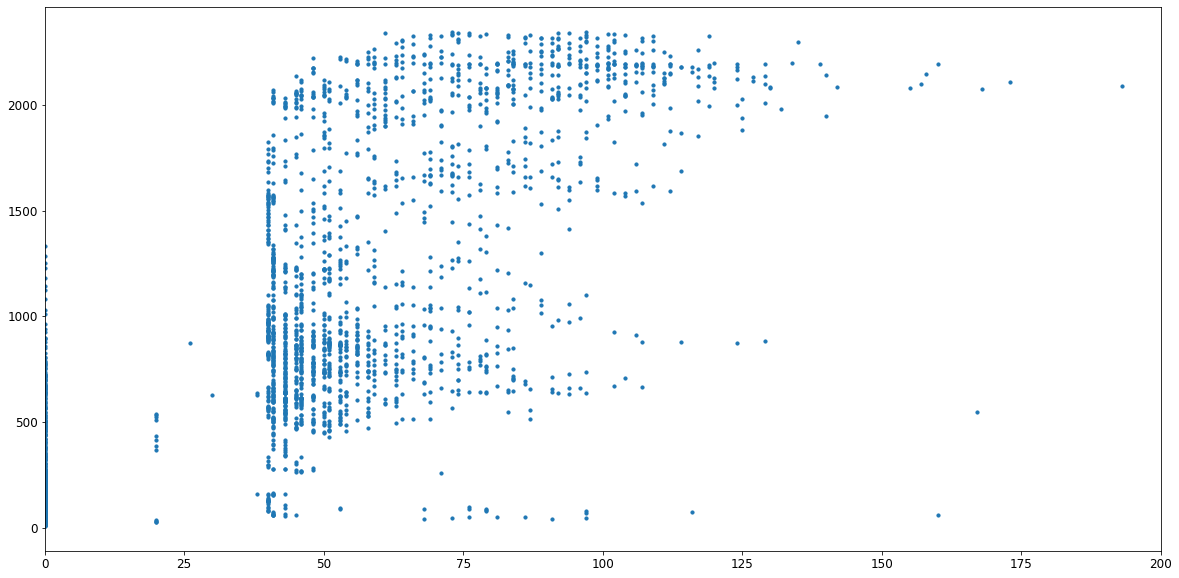

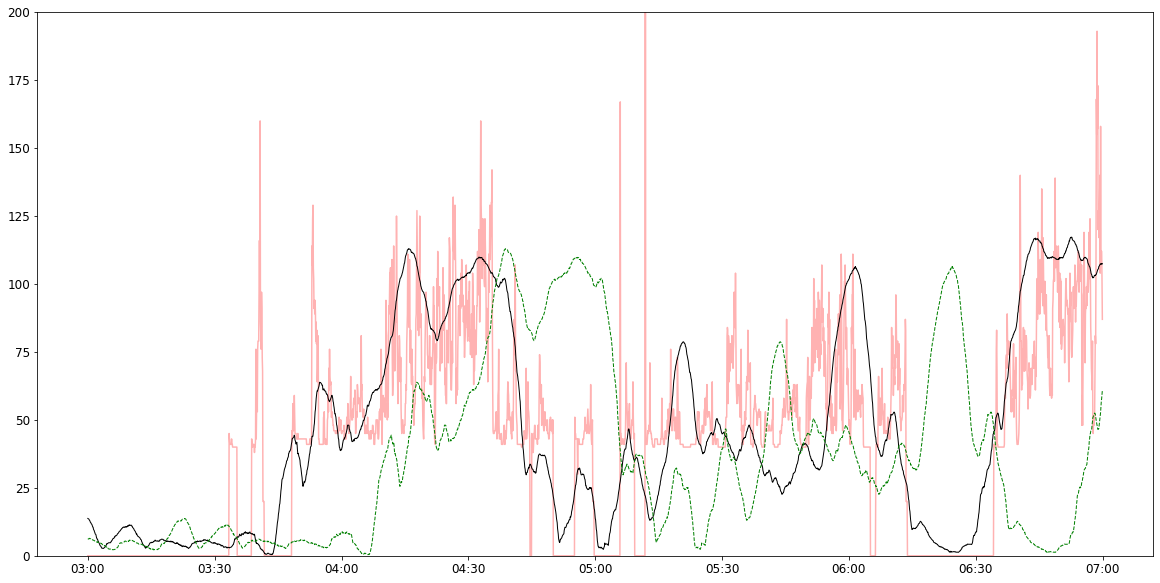

In [147]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

m = 9 # месяц
d = 12 # день

h1 = 3 # начало интервала
h2 = 6 # конец интервала

column_names = ["DateTime","Traffic1","Traffic2"]
hui = pd.DataFrame(columns = column_names)

hui['DateTime'] = Traf['DateTime']
hui['Traffic1'] = Traf['Traffic']
hui['Traffic2'] = Traf['Traffic']

hui['Traffic1'] = hui['Traffic1'].shift(-275)

cur = RezL[(RezL['DateTime'].dt.month == m) & (RezL['DateTime'].dt.day == d) & (RezL['DateTime'].dt.hour >= h1) & (RezL['DateTime'].dt.hour <= h2)]
cargo = hui[(hui['DateTime'].dt.month == m) & (hui['DateTime'].dt.day == d) & (hui['DateTime'].dt.hour >= h1) & (hui['DateTime'].dt.hour <= h2)]

print(cur['Current'].corr(cargo['Traffic1']))
print(cur['Current'].corr(cargo['Traffic2']))

fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(cur['Current'], cargo['Traffic1'], s = 10)
# ax.scatter(cur['Current'], cargo['Traffic2'], s = 5, color = 'r', alpha = .3)
plt.xlim(0,200)

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(cur['DateTime'], cur['Current'], 
        color = 'r',label='Ток',alpha=.3)

ax.plot(cargo['DateTime'], cargo['Traffic1'] / 20, 
        'k',linewidth=1,label='Грузопоток')

ax.plot(cargo['DateTime'], cargo['Traffic2'] / 20, 
        'g',linewidth=1,linestyle='--',label='Грузопоток')

plt.ylim(0,200)
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


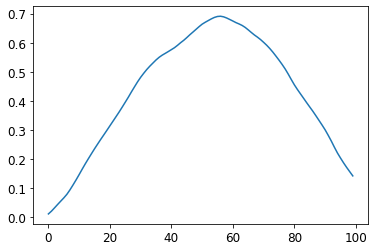

In [142]:
kk = []
tt = []

for i in range(100):
    
    m = 9 # месяц
    d = 12 # день

    h1 = 3 # начало интервала
    h2 = 6 # конец интервала

    column_names = ["DateTime","Traffic1","Traffic2"]
    hui = pd.DataFrame(columns = column_names)

    hui['DateTime'] = Traf['DateTime']
    hui['Traffic1'] = Traf['Traffic']
    hui['Traffic2'] = Traf['Traffic']

    hui['Traffic1'] = hui['Traffic1'].shift(-i*5)

    cur = RezL[(RezL['DateTime'].dt.month == m) & (RezL['DateTime'].dt.day == d) & (RezL['DateTime'].dt.hour >= h1) & (RezL['DateTime'].dt.hour <= h2)]
    cargo = hui[(hui['DateTime'].dt.month == m) & (hui['DateTime'].dt.day == d) & (hui['DateTime'].dt.hour >= h1) & (hui['DateTime'].dt.hour <= h2)]

    kk.append(cur['Current'].corr(cargo['Traffic1']))
    tt.append(-i*5)
    
    print(i)

plt.plot(kk)

In [145]:
tt

[0,
 -100,
 -200,
 -300,
 -400,
 -500,
 -600,
 -700,
 -800,
 -900,
 -1000,
 -1100,
 -1200,
 -1300,
 -1400,
 -1500,
 -1600,
 -1700,
 -1800,
 -1900,
 -2000,
 -2100,
 -2200,
 -2300,
 -2400,
 -2500,
 -2600,
 -2700,
 -2800,
 -2900,
 -3000,
 -3100,
 -3200,
 -3300,
 -3400,
 -3500,
 -3600,
 -3700,
 -3800,
 -3900,
 -4000,
 -4100,
 -4200,
 -4300,
 -4400,
 -4500,
 -4600,
 -4700,
 -4800,
 -4900,
 -5000,
 -5100,
 -5200,
 -5300,
 -5400,
 -5500,
 -5600,
 -5700,
 -5800,
 -5900,
 -6000,
 -6100,
 -6200,
 -6300,
 -6400,
 -6500,
 -6600,
 -6700,
 -6800,
 -6900,
 -7000,
 -7100,
 -7200,
 -7300,
 -7400,
 -7500,
 -7600,
 -7700,
 -7800,
 -7900,
 -8000,
 -8100,
 -8200,
 -8300,
 -8400,
 -8500,
 -8600,
 -8700,
 -8800,
 -8900,
 -9000,
 -9100,
 -9200,
 -9300,
 -9400,
 -9500,
 -9600,
 -9700,
 -9800,
 -9900]

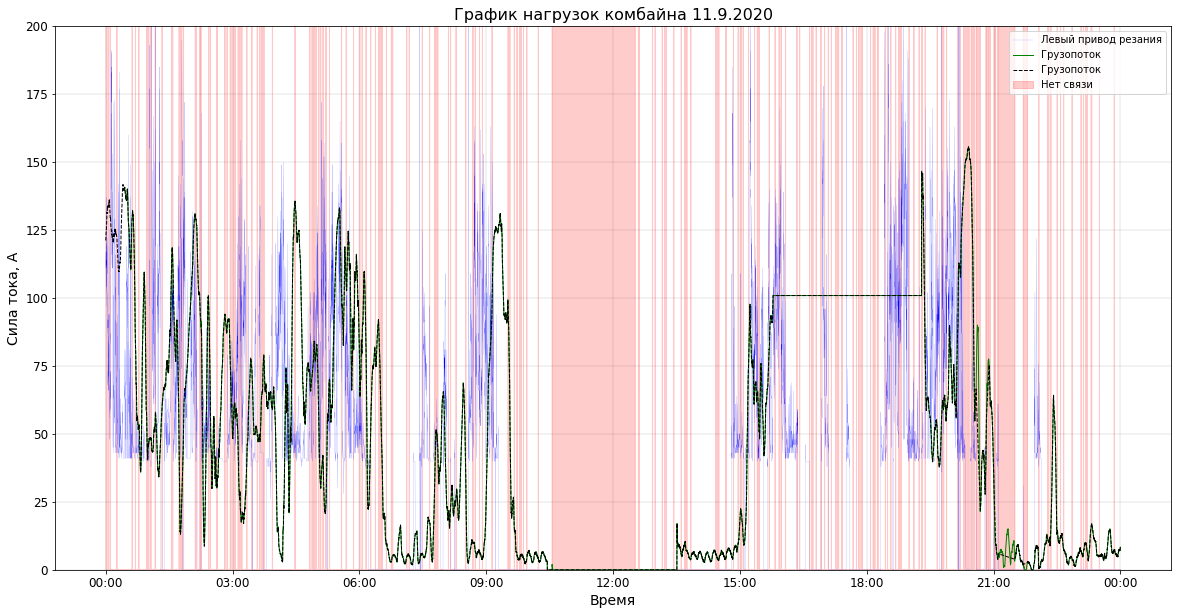

In [101]:
# график 

import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt

m = 9 # месяц
d = 11 # день

h1 = 0 # начало интервала
h2 = 23 # конец интервала

fig, ax = plt.subplots(figsize=(20,10))

plt.rcParams.update({'axes.titlesize': 16,
                    'xtick.labelsize': 12,
                    'ytick.labelsize': 12})
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)

ax.set(title=('График нагрузок комбайна ' + str(d) + '.' + str(m) + '.2020'), ylabel='Сила тока, А',xlabel='Время');

ax.plot(RezL[(RezL['DateTime'].dt.month == m) & (RezL['DateTime'].dt.day == d) & (RezL['DateTime'].dt.hour >= h1) & (RezL['DateTime'].dt.hour <= h2)]['DateTime'],
        RezL[(RezL['DateTime'].dt.month == m) & (RezL['DateTime'].dt.day == d) & (RezL['DateTime'].dt.hour >= h1) & (RezL['DateTime'].dt.hour <= h2)]['Current'], 
        'b',linewidth=.1,label='Левый привод резания')

ax.fill_between(RezL[(RezL['DateTime'].dt.month == m) & (RezL['DateTime'].dt.day == d) & (RezL['DateTime'].dt.hour >= h1) & (RezL['DateTime'].dt.hour <= h2)]['DateTime'],
        1000*RezL[(RezL['DateTime'].dt.month == m) & (RezL['DateTime'].dt.day == d) & (RezL['DateTime'].dt.hour >= h1) & (RezL['DateTime'].dt.hour <= h2)]['Uncert'], 
        color = 'r',label='Нет связи',alpha=.2)

ax.plot(Traf[(Traf['DateTime'].dt.month == m) & (Traf['DateTime'].dt.day == d) & (Traf['DateTime'].dt.hour >= h1) & (Traf['DateTime'].dt.hour <= h2)]['DateTime'],
        Traf[(Traf['DateTime'].dt.month == m) & (Traf['DateTime'].dt.day == d) & (Traf['DateTime'].dt.hour >= h1) & (Traf['DateTime'].dt.hour <= h2)]['Traffic'] / 20, 
        'g',linewidth=1,label='Грузопоток')

ax.plot(Traf_un[(Traf_un['DateTime'].dt.month == m) & (Traf_un['DateTime'].dt.day == d) & (Traf_un['DateTime'].dt.hour >= h1) & (Traf_un['DateTime'].dt.hour <= h2)]['DateTime'],
        Traf_un[(Traf_un['DateTime'].dt.month == m) & (Traf_un['DateTime'].dt.day == d) & (Traf_un['DateTime'].dt.hour >= h1) & (Traf_un['DateTime'].dt.hour <= h2)]['Traffic'] / 20, 
        'k',linewidth=1,linestyle='--',label='Грузопоток')

plt.ylim(0,200)

myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.grid(color='k', linestyle='-', linewidth=0.1)
ax.legend()